# 02_01.Artificial Neural Network(예측)

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

In [ ]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

## 3.데이터 전처리
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 5.모델구축
from sklearn.neural_network import MLPRegressor # 다층인공신경망(예측)
#from sklearn.neural_network import MLPClassifier # 다층인공신경망(분류)

## 6.모델검정
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 7.최적화
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

## 2.데이터 불러오기

### 2.1 구글 드라이브와 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.2 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/주택가격.csv', encoding="cp949")
housing_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,2,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,3,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,4,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,5,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 2.3 자료구조 살펴보기

In [ ]:
housing_df.shape

In [ ]:
housing_df.info()

In [ ]:
housing_df.columns

## 3.데이터 전처리

### 3.1 필요없는 변수 제거

In [ ]:
housing_df = housing_df.drop (['id'], axis=1)
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 3.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
housing_df['주거유형'] = housing_df['주거유형'].replace ([1,2,3,4,5], ['단독주택','2가구변경','듀플렉스','타운젠트바깥쪽','타운젠트안쪽'])
housing_df['판매유형'] = housing_df['판매유형'].replace ([1,2], ['보증증서','법원관리증서'])
housing_df['판매조건'] = housing_df['판매조건'].replace ([1,2], ['정상판매','압류및공매도'])
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,181500,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,223500,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,140000,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


## 4.데이터 탐색

### 4.1 EDA 데이터 탐색

In [ ]:
# 수치형 변수
housing_df.describe().round(2).T

In [ ]:
# 범주형 변수
# lecture_df.columns
categorical_features=['주거유형', '판매유형', '판매조건']

for col in categorical_features:
    cat = housing_df[col].value_counts()
    print(cat)

### 4.2 그래프 그리기

In [ ]:
# 한글 폰트 인식
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 수치형 변수
g = sns.pairplot(housing_df)

In [ ]:
# 변수별 선형회귀직선
variables = ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
             '차고면적', '면적_1층', '면적_2층']

for var in variables:
    plt.figure()
    sns.regplot(x = var, y = '가격', data = housing_df).set(title=f'{var} and 가격에 따른 회귀직선');

In [ ]:
# 범주형 변수
for col in categorical_features:
    sns.countplot(x=col, data = housing_df)
    plt.show()

### 4.3 base accuracy


In [ ]:
# base accuracy
housing_df['가격'].mean()

## 5.훈련/테스트용 데이터 분할


### 5.1 data와 target으로 분리
- data: X, target: y 로 분리

- X 추출


In [ ]:
X = housing_df.drop (['가격'], axis=1)
X.head()

,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


- target(y) 추출
- y 값을 series에서 배열로 변환

In [ ]:
y = housing_df['가격']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: 가격, dtype: int64

In [ ]:
# 선형모델의 y 값 표준화
y = StandardScaler().fit_transform(y[:, np.newaxis]).flatten()
y

<ipython-input-20-86a83c11e717>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = StandardScaler().fit_transform(y[:, np.newaxis]).flatten()


array([ 0.87174655,  0.3601134 ,  1.15598719, ...,  1.97081036,
       -0.38601829, -0.28416539])

### 5.2 훈련용 및 테스트용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할(분류모형일때 사용)

In [ ]:
# \ 이후에 space 없어야 함
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [ ]:
X_train.info()

In [ ]:
y_train.shape

In [ ]:
X_test.info()

In [ ]:
y_test.shape

## 6.pipeline으로 데이터 전처리
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
- R에서 recipe
- 범주형 변수: OneHotEncoder
- 수치형 변수:
- 선형모델은 StandardScaler 로 표준화
- tree형 모델은 데이터 원형 사용

### 6.1 preprocess 세팅

In [ ]:
# pipeline으로 세팅
# 수치형 변수(y는 제외)
numeric_features = ['연면적', '품질', '상태', '건축년도', '리모델링년도',
                    '지하면적', '차고면적', '면적_1층', '면적_2층']

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')), # 누락된 값은 중앙값으로 처리
        ('scaler', StandardScaler())
    ]
)

# 범주형 변수(y는 제외)
categorical_features=['주거유형', '판매유형', '판매조건']

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant',
                                  fill_value='missing')),  # 누락된 값은 missing으로 상수 처리
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# preprocessor로 데이터 변환 세팅
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
                                  '차고면적', '면적_1층', '면적_2층']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['주거유형', '판매유형', '판매조건'])])

### 6.2 데이터 전처리 결과 확인
- https://www.kaggle.com/code/thomasswain/titanic-classifier

In [ ]:
pd.DataFrame(preprocessor.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.596577,-0.709282,1.204375,0.067463,-0.614537,-0.610066,0.965758,-1.005785,-0.789563,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.494475,-1.529824,-0.588082,-0.106458,-0.860567,-0.093881,-0.052596,-0.425396,-0.789563,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.075530,-0.709282,-0.588082,0.206599,-0.417714,-0.265943,-2.343893,-0.618859,1.430503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-2.147846,-0.709282,-0.588082,0.067463,-0.614537,-0.981073,-0.010165,-1.422939,0.875486,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.894487,-0.709282,-1.484311,-1.115198,-1.598655,-0.265943,-1.070950,-0.618859,0.320470,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## 7.모델만들기 (모델 설정)
- R에서 workflow
- 예측모델: 000_reg
- 분류모델: 000_clf

### 7.1 pipeline으로 모델 연결

In [ ]:
mlp_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("mlp_reg", MLPRegressor())
    ]
)

mlp_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['연면적', '품질', '상태', '건축년도',
                                                   '리모델링년도', '지하면적', '차고면적',
                                                   '면적_1층', '면적_2층']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['주거유형', '판매유형', '판매조건'])])),
                ('mlp_reg', MLPRegressor())])

### 7.2 하이퍼파라미터 세팅
- 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼 파라미터 튜닝

In [ ]:
mlp_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'mlp_reg', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__impu

In [ ]:
# 예측모델의 hidden layer는 500개 이상, 2 tier가 필요
# 더 많은 파라미터로 연습해 보기
mlp_grid = {
    'mlp_reg__hidden_layer_sizes': [(5, 5),(5, 10),(10, 5),(10, 10)],
    'mlp_reg__alpha': np.logspace(-5, -3, 3),
}

### 7.3 하이퍼파라미터 그리드 만들기

In [ ]:
mlp_gs = GridSearchCV(estimator = mlp_pipe,
                       param_grid = mlp_grid,
                       scoring='r2',             # mse, r2
                       cv = 5,
                       n_jobs = -1,
                       verbose = 10,              # 프로세스 진행사항 확인
                       return_train_score = True) # 훈련결과 저장

## 8.모델 훈련(모델 학습)
- machine learning

### 8.1 모델 훈련하기(learning)

In [ ]:
mlp_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['연면적',
                                                                          '품질',
                                                                          '상태',
                                                                          '건축년도',
                                                                          '리모델링년도',
                                                                          '지하면적',
                                                                          '차고면적',
                                                                          '면적_1층',
                                                                          '면적_2층']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['주거유형',
                                                                          '판매유형',
                                                                          '판매조건'])])),
                                       ('mlp_reg', MLPRegressor())]),
             n_jobs=-1,
             param_grid={'mlp_reg__alpha': array([1.e-05, 1.e-04, 1.e-03]),
                         'mlp_reg__hidden_layer_sizes': [(5, 5), (5, 10),
                                                         (10, 5), (10, 10)]},
             return_train_score=True, scoring='r2', verbose=10)

### 8.2 검증 곡선으로 Tuning 결과 확인
- 결과 표로 정리: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py
- 그래프로 정리: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

In [ ]:
# 결과확인
mlp_gs.cv_results_

{'mean_fit_time': array([0.53114572, 0.88409338, 0.96925559, 1.04434662, 0.80024881,
        0.51467338, 0.55439544, 0.56550364, 0.49842896, 0.67765861,
        0.98304367, 0.69863024]),
 'std_fit_time': array([0.02489354, 0.15840858, 0.11356681, 0.06944397, 0.15293287,
        0.06565527, 0.01322426, 0.04598722, 0.04121621, 0.16836764,
        0.01623677, 0.22132141]),
 'mean_score_time': array([0.00812931, 0.01208105, 0.0159338 , 0.01244435, 0.01158342,
        0.00810242, 0.0087944 , 0.00846782, 0.00819364, 0.0106741 ,
        0.01302633, 0.01041002]),
 'std_score_time': array([0.00019158, 0.00386797, 0.00489324, 0.00314832, 0.00407152,
        0.00045478, 0.00054323, 0.00038083, 0.00028179, 0.00391362,
        0.00302517, 0.00428159]),
 'param_mlp_reg__alpha': masked_array(data=[1e-05, 1e-05, 1e-05, 1e-05, 0.0001, 0.0001, 0.0001,
                    0.0001, 0.001, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    F

In [ ]:
# 분석결과를 표로 정리
results_df = pd.DataFrame(mlp_gs.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
"1e-05_(5, 10)","{'mlp_reg__alpha': 1e-05, 'mlp_reg__hidden_lay...",1,0.867289,0.022727
"0.0001_(10, 10)","{'mlp_reg__alpha': 0.0001, 'mlp_reg__hidden_la...",2,0.866966,0.022779
"0.001_(10, 10)","{'mlp_reg__alpha': 0.001, 'mlp_reg__hidden_lay...",3,0.865669,0.020380
"1e-05_(10, 10)","{'mlp_reg__alpha': 1e-05, 'mlp_reg__hidden_lay...",4,0.865455,0.018336
"0.0001_(10, 5)","{'mlp_reg__alpha': 0.0001, 'mlp_reg__hidden_la...",5,0.864639,0.014977
"0.0001_(5, 10)","{'mlp_reg__alpha': 0.0001, 'mlp_reg__hidden_la...",6,0.863985,0.022342
"0.0001_(5, 5)","{'mlp_reg__alpha': 0.0001, 'mlp_reg__hidden_la...",7,0.861773,0.013629
"0.001_(5, 10)","{'mlp_reg__alpha': 0.001, 'mlp_reg__hidden_lay...",8,0.860431,0.021114
"0.001_(10, 5)","{'mlp_reg__alpha': 0.001, 'mlp_reg__hidden_lay...",9,0.857349,0.042198


In [ ]:
# 튜닝결과 그래프
# 파라미터값이 ( , )로 되어 있어서 그래프로 구현 못함

### 8.3 best 모델 설정

In [ ]:
# best 모델 파라미터 확인
print(mlp_gs.best_score_)
print(mlp_gs.best_params_)

0.8672889635445522
{'mlp_reg__alpha': 1e-05, 'mlp_reg__hidden_layer_sizes': (5, 10)}


In [ ]:
# best 모델 파라미터를 최종모델로 훈련
best_reg = mlp_gs.best_estimator_
best_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['연면적', '품질', '상태', '건축년도',
                                                   '리모델링년도', '지하면적', '차고면적',
                                                   '면적_1층', '면적_2층']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['주거유형', '판매유형', '판매조건'])])),
                ('mlp_reg',
                 MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 10)))])

In [ ]:
print(best_reg['mlp_reg'])

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 10))


### 8.4 중요변수확인

In [ ]:
# 중요도 점수 계산
# Hidden lay로 되어 있어서 점수 계산 안됨

In [ ]:
# 그래프 그리기

## 9.모델 test 및 검정

### 9.1 검증용 데이터로 예측
- predict (class로 표시)
- predict_proba (확률값으로 표시): 분류모델에서 사용

In [ ]:
y_pred = best_reg.predict(X_test) # mlp_reg -> mlp_pipe
y_pred

array([ 1.21471907, -0.87347136, -1.86077236,  0.71933888, -0.01849575,
        0.72569278, -0.26842716, -0.85296678, -0.37638054, -0.42936489,
       -0.17150825, -0.42936489, -0.47195468, -0.14694256, -0.56378209,
       -0.4100396 , -0.2396085 , -0.77314936, -0.66092129,  0.14822367,
       -0.88412015,  0.1077856 , -0.42936489,  1.35147428,  1.27787221,
        1.50409147, -0.30991033, -0.95432983,  0.62230275, -1.4730631 ,
       -1.78725186, -0.70628857, -0.48250922,  0.84404398,  1.83053246,
        0.98070327,  2.30194768,  0.34363726,  0.87533305,  0.94730251,
       -0.22315974, -0.08376308,  0.90144767, -0.46335518,  1.88062249,
       -1.23567285, -0.68616969, -1.17373995,  0.90265911, -0.40752222,
        0.83395825, -0.77889688, -0.10275855,  1.28600896,  0.27038246,
        0.87558146,  1.34153171, -0.22929669, -0.71106374, -1.35703564,
       -0.43535748,  0.43972826, -0.48258237,  0.09828143,  1.95172849,
       -0.37411211, -0.65462194,  0.05894993, -0.54171638, -0.72

### 9.2 실제값과 예측값 확인

In [ ]:
output = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
output

,Actual,Predicted
0,1.411804,1.214719
1,-1.023570,-0.873471
2,-1.705369,-1.860772
3,1.487601,0.719339
4,0.316530,-0.018496
...,...,...
349,1.203361,0.984207
350,1.960938,1.710614
351,0.578031,0.119120
352,1.080190,1.256710


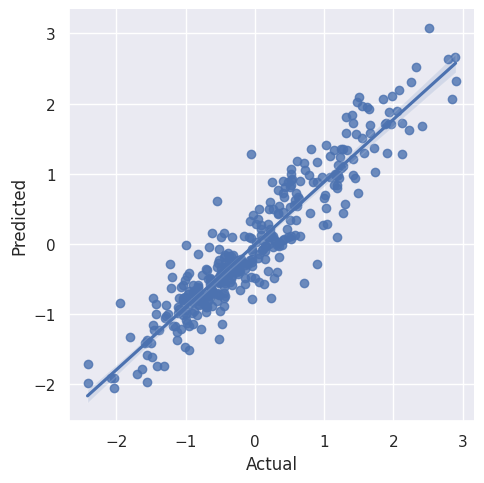

In [ ]:
sns.lmplot(x ='Actual', y ='Predicted', data = output)

### 9.3 모델 검정

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test,y_pred))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: %.3f' % r2_score(y_test,y_pred))

MSE: 0.134
MAE: 0.278
RMSE: 0.367
R2: 0.867
